In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/KDT_project/data/Sleep Analysis Data (1).csv')

In [ ]:
data.shape

(2955, 5)

In [ ]:
data.head()

,Start,End,Duration (hr),Value,Source
0,2023-02-13 23:21:07,2023-02-14 08:47:48,9.440,InBed,NHC
1,2023-02-13 23:50:25,2023-02-14 00:07:25,0.283,Core,Sujeong의 Apple Watch
2,2023-02-14 00:07:25,2023-02-14 00:27:25,0.333,Deep,Sujeong의 Apple Watch
3,2023-02-14 00:27:25,2023-02-14 00:30:25,0.050,Core,Sujeong의 Apple Watch
4,2023-02-14 00:30:25,2023-02-14 00:38:25,0.133,Deep,Sujeong의 Apple Watch


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Start          2955 non-null   object 
 1   End            2955 non-null   object 
 2   Duration (hr)  2955 non-null   float64
 3   Value          2955 non-null   object 
 4   Source         2955 non-null   object 
dtypes: float64(1), object(4)
memory usage: 115.6+ KB


In [ ]:
# "Source" 열의 데이터를 레이블링 해줌.
# deep: 1, core:2, rem:3, awake:4
data['Value']= data['Value'].replace('Deep',1)
data['Value']= data['Value'].replace('Core',2)
data['Value']= data['Value'].replace('REM',3)
data['Value']= data['Value'].replace('Awake',4)

In [ ]:
data.head()

,Start,End,Duration (hr),Value,Source
0,2023-02-13 23:21:07,2023-02-14 08:47:48,9.440,InBed,NHC
1,2023-02-13 23:50:25,2023-02-14 00:07:25,0.283,2,Sujeong의 Apple Watch
2,2023-02-14 00:07:25,2023-02-14 00:27:25,0.333,1,Sujeong의 Apple Watch
3,2023-02-14 00:27:25,2023-02-14 00:30:25,0.050,2,Sujeong의 Apple Watch
4,2023-02-14 00:30:25,2023-02-14 00:38:25,0.133,1,Sujeong의 Apple Watch


In [ ]:
# first - 2/26-3/25 (2/26-3/20, 3/22-3/25)

In [ ]:
# Series to datetime
# 데이터 타입을 datetime으로 변경. 날짜와 시간 추출이 가능하도록 함.
data['Start'] = pd.to_datetime(data['Start'], format='%Y-%m-%d %H:%M:%S', errors='raise')
data['End'] = pd.to_datetime(data['End'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Start          2955 non-null   datetime64[ns]
 1   End            2955 non-null   datetime64[ns]
 2   Duration (hr)  2955 non-null   float64       
 3   Value          2955 non-null   object        
 4   Source         2955 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 115.6+ KB


In [ ]:
# first - 2/26-3/25 (2/26-3/20, 3/22-3/25)
start_date = '2023-02-25 12:00:00'
end_date = '2023-03-20 12:00:00'
first = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

In [ ]:
first.head()

,Start,End,Duration (hr),Value,Source
494,2023-02-25 23:34:41,2023-02-26 07:30:01,7.920,InBed,NHC
495,2023-02-26 00:00:40,2023-02-26 00:03:40,0.050,2,Sujeong의 Apple Watch
496,2023-02-26 00:00:40,2023-02-26 00:03:40,0.050,InBed,Sujeong의 Apple Watch
497,2023-02-26 00:03:40,2023-02-26 00:09:40,0.100,4,Sujeong의 Apple Watch
498,2023-02-26 00:09:40,2023-02-26 00:13:10,0.058,2,Sujeong의 Apple Watch


In [ ]:
first = first[(first['Source'] == 'NHC') | (first['Source'] != 'NHC') & (first['Value'] != "InBed")]
first.head()

,Start,End,Duration (hr),Value,Source
494,2023-02-25 23:34:41,2023-02-26 07:30:01,7.920,InBed,NHC
495,2023-02-26 00:00:40,2023-02-26 00:03:40,0.050,2,Sujeong의 Apple Watch
497,2023-02-26 00:03:40,2023-02-26 00:09:40,0.100,4,Sujeong의 Apple Watch
498,2023-02-26 00:09:40,2023-02-26 00:13:10,0.058,2,Sujeong의 Apple Watch
500,2023-02-26 00:13:10,2023-02-26 00:14:40,0.025,4,Sujeong의 Apple Watch


In [ ]:
first.shape

(723, 5)

In [ ]:
first.head(50)

,Start,End,Duration (hr),Value,Source
494,2023-02-25 23:34:41,2023-02-26 07:30:01,7.920,InBed,NHC
495,2023-02-26 00:00:40,2023-02-26 00:03:40,0.050,2,Sujeong의 Apple Watch
497,2023-02-26 00:03:40,2023-02-26 00:09:40,0.100,4,Sujeong의 Apple Watch
498,2023-02-26 00:09:40,2023-02-26 00:13:10,0.058,2,Sujeong의 Apple Watch
500,2023-02-26 00:13:10,2023-02-26 00:14:40,0.025,4,Sujeong의 Apple Watch
501,2023-02-26 00:14:40,2023-02-26 00:34:10,0.325,2,Sujeong의 Apple Watch
503,2023-02-26 00:34:10,2023-02-26 00:51:10,0.283,1,Sujeong의 Apple Watch
504,2023-02-26 00:51:10,2023-02-26 00:52:10,0.017,4,Sujeong의 Apple Watch
505,2023-02-26 00:52:10,2023-02-26 01:26:40,0.575,2,Sujeong의 Apple Watch
507,2023-02-26 01:26:40,2023-02-26 01:36:10,0.158,1,Sujeong의 Apple Watch


In [ ]:
first.shape

(723, 5)

In [ ]:
first.isnull().sum()

year-month-day    0
Start             0
End               0
Duration (hr)     0
Value             0
Source            0
dtype: int64

In [ ]:
# InBed 인덱
idx = first[first['Value']=='InBed'].index
idx = idx.values
idx = idx.tolist()
idx.append(first.index[-1])
idx

[494,
 540,
 574,
 606,
 619,
 650,
 692,
 721,
 760,
 796,
 826,
 877,
 912,
 938,
 997,
 1028,
 1029,
 1074,
 1126,
 1166,
 1197,
 1223,
 1283,
 1321,
 1367,
 1392,
 1409]

In [ ]:
f_tmp = first
f_tmp.insert(loc=0, column='year-month-day', value=0)

ValueError: ignored

In [ ]:
k = 0
for i in range(len(idx)-1):
  f_tmp.loc[idx[i]:(idx[i+1]),'year-month-day'] = k
  k += 1

In [ ]:
f_tmp['year-month-day'] = f_tmp["year-month-day"].astype(str)

In [ ]:
f_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723 entries, 494 to 1409
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year-month-day  723 non-null    object        
 1   Start           723 non-null    datetime64[ns]
 2   End             723 non-null    datetime64[ns]
 3   Duration (hr)   723 non-null    float64       
 4   Value           723 non-null    object        
 5   Source          723 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 55.7+ KB


In [ ]:
f_tmp = f_tmp[f_tmp['Value'] != 'InBed']

In [ ]:
f_tmp.isnull().sum()

year-month-day    0
Start             0
End               0
Duration (hr)     0
Value             0
Source            0
dtype: int64

In [ ]:
f_tmp.head(50)

,year-month-day,Start,End,Duration (hr),Value,Source
495,0,2023-02-26 00:00:40,2023-02-26 00:03:40,0.050,2,Sujeong의 Apple Watch
497,0,2023-02-26 00:03:40,2023-02-26 00:09:40,0.100,4,Sujeong의 Apple Watch
498,0,2023-02-26 00:09:40,2023-02-26 00:13:10,0.058,2,Sujeong의 Apple Watch
500,0,2023-02-26 00:13:10,2023-02-26 00:14:40,0.025,4,Sujeong의 Apple Watch
501,0,2023-02-26 00:14:40,2023-02-26 00:34:10,0.325,2,Sujeong의 Apple Watch
503,0,2023-02-26 00:34:10,2023-02-26 00:51:10,0.283,1,Sujeong의 Apple Watch
504,0,2023-02-26 00:51:10,2023-02-26 00:52:10,0.017,4,Sujeong의 Apple Watch
505,0,2023-02-26 00:52:10,2023-02-26 01:26:40,0.575,2,Sujeong의 Apple Watch
507,0,2023-02-26 01:26:40,2023-02-26 01:36:10,0.158,1,Sujeong의 Apple Watch
508,0,2023-02-26 01:36:10,2023-02-26 01:54:40,0.308,2,Sujeong의 Apple Watch


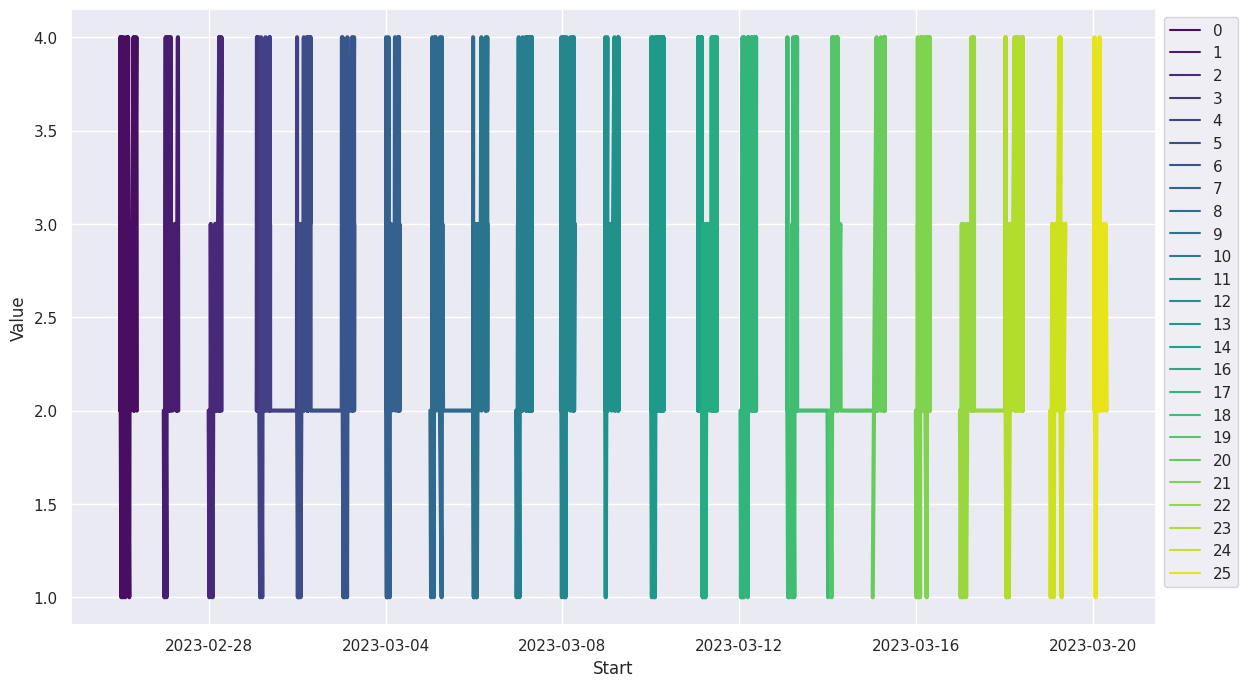

In [ ]:
import seaborn as sns
import matplotlib.ticker as ticker

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=f_tmp, x ='Start', y = 'Value',
                  hue='year-month-day', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
f_tmp.isnull().sum()

year-month-day      0
Start               0
End                 0
Duration (hr)     663
Value               0
Source              0
dtype: int64

In [ ]:
f_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697 entries, 495 to 1409
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year-month-day  697 non-null    object        
 1   Start           697 non-null    datetime64[ns]
 2   End             697 non-null    datetime64[ns]
 3   Duration (hr)   697 non-null    float64       
 4   Value           697 non-null    object        
 5   Source          697 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 54.3+ KB


In [ ]:
f_tmp[f_tmp['year-month-day']=='0']

,year-month-day,Start,End,Duration (hr),Value,Source
495,0,2023-02-26 00:00:40,2023-02-26 00:03:40,0.050,2,Sujeong의 Apple Watch
497,0,2023-02-26 00:03:40,2023-02-26 00:09:40,0.100,4,Sujeong의 Apple Watch
498,0,2023-02-26 00:09:40,2023-02-26 00:13:10,0.058,2,Sujeong의 Apple Watch
500,0,2023-02-26 00:13:10,2023-02-26 00:14:40,0.025,4,Sujeong의 Apple Watch
501,0,2023-02-26 00:14:40,2023-02-26 00:34:10,0.325,2,Sujeong의 Apple Watch
503,0,2023-02-26 00:34:10,2023-02-26 00:51:10,0.283,1,Sujeong의 Apple Watch
504,0,2023-02-26 00:51:10,2023-02-26 00:52:10,0.017,4,Sujeong의 Apple Watch
505,0,2023-02-26 00:52:10,2023-02-26 01:26:40,0.575,2,Sujeong의 Apple Watch
507,0,2023-02-26 01:26:40,2023-02-26 01:36:10,0.158,1,Sujeong의 Apple Watch
508,0,2023-02-26 01:36:10,2023-02-26 01:54:40,0.308,2,Sujeong의 Apple Watch


In [ ]:
f_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697 entries, 495 to 1409
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year-month-day  697 non-null    object        
 1   Start           697 non-null    datetime64[ns]
 2   End             697 non-null    datetime64[ns]
 3   Duration (hr)   697 non-null    float64       
 4   Value           697 non-null    object        
 5   Source          697 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 54.3+ KB


In [ ]:
tmp = f_tmp[f_tmp['year-month-day']=='0']

tmp["Duration (hr)"] = tmp["Duration (hr)"].astype('float') * 1000
tmp = tmp[["Duration (hr)", "Value"]]
tmp = np.array(tmp)
tmp



<ipython-input-61-d3dde8de0efa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["Duration (hr)"] = tmp["Duration (hr)"].astype('float') * 1000


array([[50.0, 2],
       [100.0, 4],
       [58.0, 2],
       [25.0, 4],
       [325.0, 2],
       [283.0, 1],
       [17.0, 4],
       [575.0, 2],
       [158.0, 1],
       [308.0, 2],
       [25.0, 4],
       [708.0, 2],
       [83.0, 1],
       [525.0, 2],
       [325.0, 3],
       [8.0, 4],
       [17.0, 2],
       [75.0, 3],
       [133.0, 4],
       [417.0, 2],
       [17.0, 4],
       [617.0, 2],
       [125.0, 1],
       [117.0, 2],
       [333.0, 3],
       [1070.0, 2],
       [708.0, 3],
       [17.0, 4],
       [375.0, 2],
       [8.0, 4],
       [567.0, 2],
       [550.0, 3],
       [258.0, 4],
       [417.0, 2]], dtype=object)

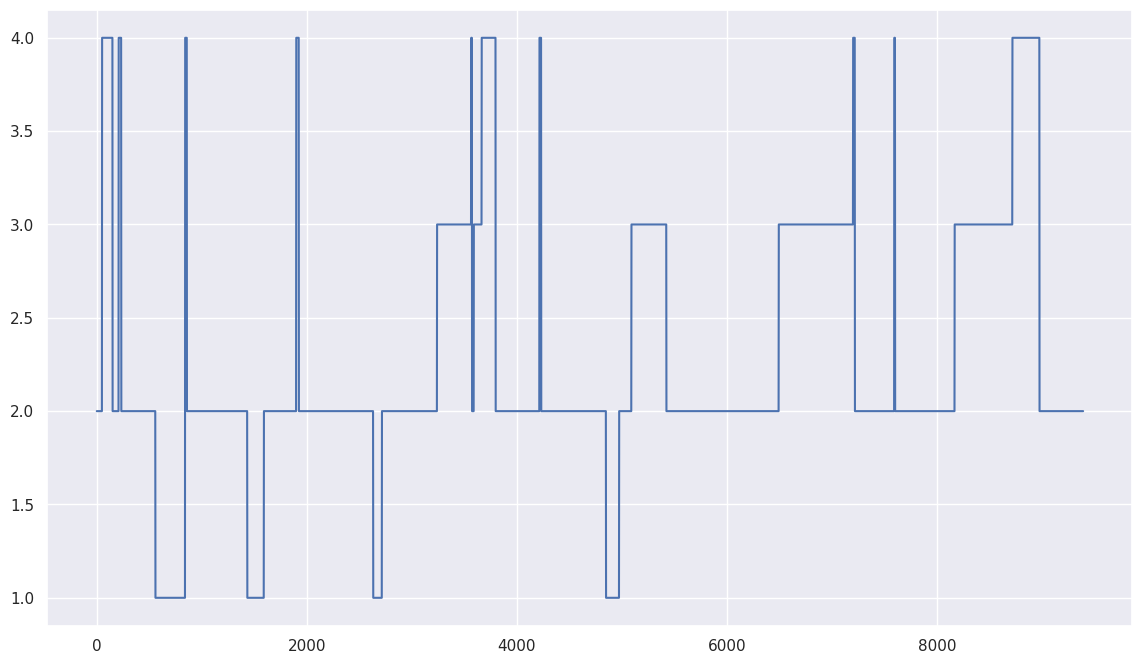

In [ ]:
x_list = []
for x in tmp:
  timeseries = np.ones([int(x[0])]) * x[1]
  x_list.append(timeseries)

x_list

ts = np.concatenate(x_list)

plt.plot(ts)

<ipython-input-63-b607c7083c0b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["Duration (hr)"] = tmp["Duration (hr)"].astype('float') * 1000
<ipython-input-63-b607c7083c0b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["Duration (hr)"] = tmp["Duration (hr)"].astype('float') * 1000
<ipython-input-63-b607c7083c0b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

ValueError: ignored

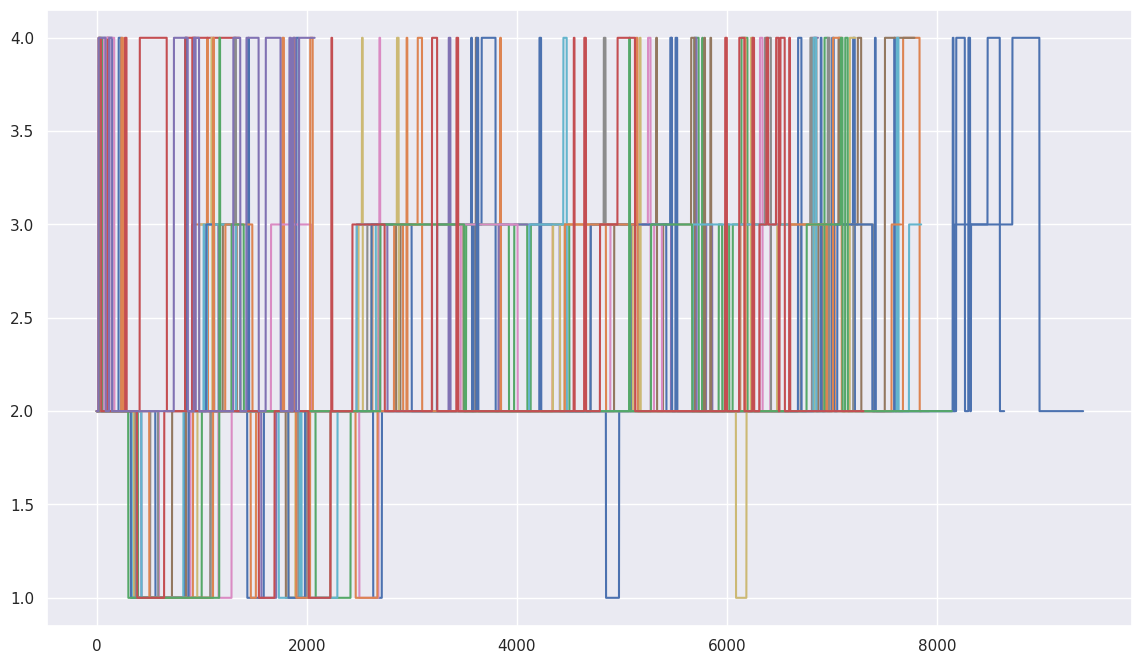

In [ ]:
for i in range(len(idx)-1):
  tmp = f_tmp.loc[idx[i]:(idx[i+1])]

  tmp["Duration (hr)"] = tmp["Duration (hr)"].astype('float') * 1000
  tmp = tmp[["Duration (hr)", "Value"]]
  tmp = np.array(tmp)

  x_list = []
  for x in tmp:
    if x[1] != 0:
      timeseries = np.ones([int(x[0])]) * x[1]
      x_list.append(timeseries)
  
  ts = np.concatenate(x_list)
  
  plt.plot(ts)

plt.show()

# Duration으로 구간을 나눠서 구간마다 기초통계량을 살펴보는 것이 좋겠음.

In [ ]:
tmp = first.iloc[:35]
tmp["Duration (hr)"] = tmp["Duration (hr)"].astype('float') * 1000

tmp = tmp[["Duration (hr)", "Value"]]
tmp['Value']= tmp['Value'].replace('InBed',0)
tmp = np.array(tmp)
tmp

<ipython-input-30-67362da01c57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["Duration (hr)"] = tmp["Duration (hr)"].astype('float') * 1000


array([[7.92e+03, 0.00e+00],
       [5.00e+01, 2.00e+00],
       [1.00e+02, 4.00e+00],
       [5.80e+01, 2.00e+00],
       [2.50e+01, 4.00e+00],
       [3.25e+02, 2.00e+00],
       [2.83e+02, 1.00e+00],
       [1.70e+01, 4.00e+00],
       [5.75e+02, 2.00e+00],
       [1.58e+02, 1.00e+00],
       [3.08e+02, 2.00e+00],
       [2.50e+01, 4.00e+00],
       [7.08e+02, 2.00e+00],
       [8.30e+01, 1.00e+00],
       [5.25e+02, 2.00e+00],
       [3.25e+02, 3.00e+00],
       [8.00e+00, 4.00e+00],
       [1.70e+01, 2.00e+00],
       [7.50e+01, 3.00e+00],
       [1.33e+02, 4.00e+00],
       [4.17e+02, 2.00e+00],
       [1.70e+01, 4.00e+00],
       [6.17e+02, 2.00e+00],
       [1.25e+02, 1.00e+00],
       [1.17e+02, 2.00e+00],
       [3.33e+02, 3.00e+00],
       [1.07e+03, 2.00e+00],
       [7.08e+02, 3.00e+00],
       [1.70e+01, 4.00e+00],
       [3.75e+02, 2.00e+00],
       [8.00e+00, 4.00e+00],
       [5.67e+02, 2.00e+00],
       [5.50e+02, 3.00e+00],
       [2.58e+02, 4.00e+00],
       [4.17e+

In [ ]:
x_list = []
for x in tmp:
  if x[1] != 0:
    timeseries = np.ones([int(x[0])]) * x[1]
    x_list.append(timeseries)

In [ ]:
ts = np.concatenate(x_list)

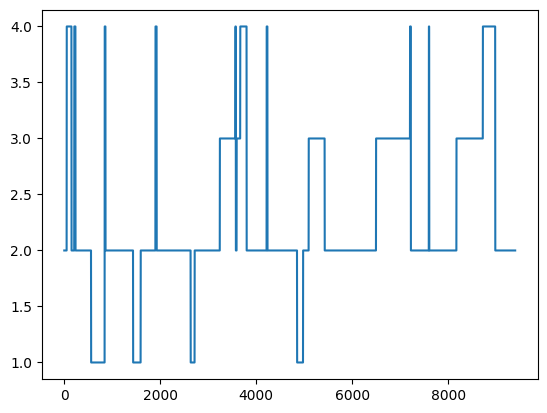

In [ ]:
import matplotlib.pyplot as plt
plt.plot(ts)